In [1]:
import sys
sys.path.append("/Users/danielmunson/dev/simple_net")

from pprint import pprint

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from simple_net.components.network import Network
from simple_net.functions.utils import (
    vectorize,
    random_subset
)
from simple_net.functions.cost import (
    mean_squared_error,
    mse_gradient,
    arithmetic_mean
)
from simple_net.functions.activations import (
    sigmoid,
    ddx_sigmoid
)

In [3]:
from data.load_mnist import load_mnist
DATA_PATH = '/Users/danielmunson/dev/simple_net/data/mnist/train.csv'
train_ftrs, train_labels = load_mnist(DATA_PATH)

In [4]:
print(len(train_ftrs),len(train_labels))

42000 42000


In [5]:
layers = [784, 100, 10]
IN_DIMS = layers[0]
OUT_DIMS = layers[-1]

NN = Network(
    layer_dims = layers,
    activations = [sigmoid for _ in layers], # will automatically vectorize
    activation_derivatives = [ddx_sigmoid for _ in layers], # will automatically vectorize
    cost_function = mean_squared_error,
    cost_gradient = mse_gradient,
    learning_rate = 1,
    gradient_aggregator = arithmetic_mean
)

from random import choices
BATCH_SIZE = 15
EPOCHS = 500
DATA_SIZE = len(train_ftrs)

for _ in range(EPOCHS):
    feature_subset, label_subset = random_subset(
        train_ftrs,
        train_labels,
        BATCH_SIZE
    )
    
    NN.run_epoch(feature_subset, label_subset)

/Users/danielmunson/dev/simple_net/simple_net/functions/activations.py:9: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-x))


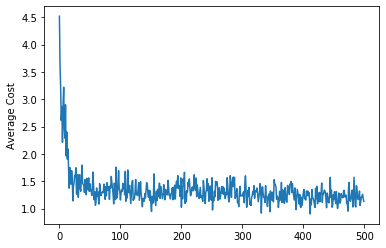

In [6]:
plt.plot(
    [i for i in range(len(NN._epochs))],
    [data['agg_gradient_magnitude'] for data in NN._epochs]
)
plt.ylabel('Average Cost')
plt.show()